나이브 베이즈(Naive Bayes)

나이브는 순진하는 뜻으로, 이유는 데이터셋의 모든 특징들이 동등하고 독립적이라고 가정하기 떄문.

나이브 베이즈 분류를 이해하기 위해서는 기본이 되는 베이즈의 정리를 알아야 함.

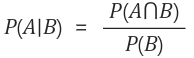

조건부 확률 P(A|B)는 사건 B가 발생한 경우 A의 확률.

베이즈 정리는 P(A|B)의 추정이 P(A∩B)와 P(B)에 기반을 두어야 한다는 정리

13.1 바보 스팸 필터

가능한 모든 메시지에 의의로 메시지를 선택하는 공간이 있다고 가정.

메시지가 스팸 : S

메시지에 비아그라라는 단어가 포함되는 경우 : V

베이즈 정리를 사용하면 메시지에 비아그라라는 단어가 포함되었을 때, 해당 메시지가 스팸일 확률은 다음과 같다.

$$ P(S|V) = {{[P(V|S)P(S)]} \over {[P(V|S)P(S)+P(V|\neg S)P(\neg S)]}} $$

분자는 메시지가 스팸이면서 비아그라 단어를 포함하고 있을 확률을 나타냄.

반면, 부모는 메시지가 비아그라라는 단어가 포함되었을 확률.

즉, 이 식은 비아그라라는 단어가 포함된 모든 메시지 중에서 스팸 메시지의 비율을 나타낸다고 이해할 수 있다.

만약 수많은 스팸 메시지와 스팸이 아닌 메시지를 갖고 있다고, $$P(V|S)$$ $$P(V| \neg S)$$를 쉽게 추정할 수 있다.
만약 메시지가 스팸일 확률과 스팸이 아닌 확률이 동일하다면, 즉,

$$ P(S) = P(\neg S) = 0.5 $$

위의 식이 다음과 같이 정리 됨.

$$ P(S|V) = {{P(V|S) \over [P(V|S) + P(V|\neg S)]}} $$

예를 들어 스팸 메시지 중 50%, 스팸이 아닌 메시지 중 1%만이 비아그라라는 단어를 포함한다면,

비아그라라는 단어를 포함하고 있는 메시지가 스팸일 확률은,

0.5/0.5 + 0.01 = 98%

13.2 조금 더 똑똑한 스팸 필터

이제 더 많은 단어 w1, ..., wn이 주어졌다고 가정.

확률이론을 적용하기 위해 wi가 메시지에 포함되는 경우를 Xi로 나타내고,

스팸 메시지에 i번째 단어가 포함되어 있는 확률인 $$P(Xi|S)$$ 와 스팸이 아닌 메시지에 i번째 단어가 포함되어 있는 확률인 $$P(Xi|\neg S)$$가 주어졌다고 가정.

나이브 베이즈(Naive Bayes)의 핵심은 '메시지가 스팸이냐 아니냐가 주어진다는 조건 하에 각 단어의 존재(혹은 부재)는 서로 조건부 독립적이다'라는 (말도 안 되는) 가정에 기반에 둔다.

이 가정을 직관적으로 이해하면, 어떤 스팸 메시지가 '비아그라'라는 단어를 포함하고 있다는 점이 같은 메시지가 '롤렉스'라는 단어를 포함하고 있는지를 판단하는 데 도움을 주지 않는다는 것을 의미.

$$ P(X1 = x1,...,Xn = xn|S) = P(X1 = x1|S) * ... * P(Xn = xn|S) $$

'나이브(단순한)' 베이즈라는 이름에서 알 수 있듯, 나이즈 베이즈는 너무 극단적인 가정을 함.

예를 들면 사전에 수록된 단어가 '비아그라'와 '롤렉스'뿐이며, 모든 스팸 메시지의 반은 '값싼 비아그라'에 대한 메시지이고, 나머지 스팸 메시지는 '정품 롤렉스'에 대한 메시지라고 가정. 이런 경우 나이브 베이즈는 스팸 메시지에 '비아그라'와 '롤렉스'라는 단어가 포함될 확률을 다음과 같이 추정

$$ P(X1 = 1, X2 = 1|S)  =$$ 
$$P(X1 = 1|S)P(X2 = 1|S) =$$
$$.5*.5 =$$
$$ 25 $$

현실에서는 '비아그라'와 '롤렉스'가 동시에 등장하지 않는다는 가정이 없었기 때문.

비록 말도 안되는 가정으로 모델을 만들었지만, 성능은 상당히 뛰어나며, 실제 스팸필터로 사용 가능.

'비아그라'라는 단어만으로 스팸을 걸러 내는 필터에서도 사용된 베이즈 정리를 통해 메시지가 스팸일 확률을 다음과 같이 계산

$$ P(S|X = x)  =$$
$$ {P(X=x|S) \over [P(X=s|S)+P(X=x|\neg S)]} $$

나이브 베이즈 가정에 따르면, 간단하게 각 단어가 메시지에 포함될 확률 값을 모두 곱해서 위 식의 우현에 위치한 값을 모두 구할 수 있음.

실제 구현할 땐, 끊임없이 확률 값을 곱하는 것을 피하자. 컴퓨터가 0에 가까운 부동소수점을 제대로 처리하지 못해서 언더플로 문제가 발생하기 때문.

기본적인 수학 내용을 더듬으면,

log(ab) = log a + log b 이고, exp(log x) = x.

그럼 소수점 문제를 피하기 위해 p1 * ... * pn 는 다음과 같이 계산.

$$ \exp(\log(p1) + ... + \log(pn)) $$

이제 스팸이나 스팸이 아닌 메시지에 단어 wi가 포함될 확률인 $$P(Xi|S) 와 P(Xi|\neg S)$$의 값을 추정하는 문제가 남음.

만약 이미 스팸과 스팸이 아닌 메시지로 분류된 '학습'메시지가 충분히 주어졌다면, P(Xi|S)를 추정할 수 있는 가장 간단한 방법은 스팸 메시지 중 wi가 포함되어 있는 메시지의 비율을 사용하는 것.

하지만 단점이 있음.

주어진 학습 데이터에 '데이터'라는 단어는 스팸이 아닌 메시지에만 포함되어 있다고 상상.

즉, P("데이터"|S)=0 일것.

그렇다면 나이브 베이즈 분류기는 '데이터'라는 단어가 들어간 메시지를 항상 스팸 메시지가 아니라고 예측 할 것.

심지어 '값싼 비아그라와 정품 롤렉스에 대한 데이터'라는 메시지도 스팸이 아니라고 예측할 것.

이런 문제를 처리하기 위해서는 일종의 smoothing(평활화)가 필요.

Smoothing을 위해 가짜 빈도수(pseudocount) k를 결정하고 스팸 메시지에서 i번째 단어가 나올 확률을 다음과 같이 추정 할 수 있다.

$$P(Xi|S) = {(k+wi를 포함하고 있는 스팸 수) \over (2k + 스팸 수)}$$

$$P(Xi|\neg S) 도 비슷하게 계산 가능. $$

즉, 스팸 메시지에서 i번째 단어가 나올 확률을 계산할 때 해당 단어가 포함된 스팸과 포함되지 않을 스팸이 이미 각각 k번씩 나왔다고 가정.

예를 들어 '데이터'라는 단어는 98개의 스팸 문서에서 단 한번도 나타나지 않았지만, k가 1이라면
P("데이터"|S)를 1/100 = 0.01로 계산할 수 있다.

즉, '데이터'라는 단어가 포함된 메시지가 스팸 메시지일 확률을 0이 아닌 다른 확률값으로 설정할 수 있게 해준다.

13-3 구현하기

In [10]:
#우선, 메시지를 단어 단위로 잘라 주는 함수를 구현한다.
#1. 메시지를 모두 소문자로 바꾼다.
#2. re.findall()을 사용해서 문자, 숫자, 혹은 따옴표(apostrophe)가 포함된 모든 단어를 추출한다.
#3. 마지막으로, set()을 사용해 중복되는 단어를 제거한다.

from typing import Set
import re

def tokenize(text):
    text = text.lower()                         # 소문자로 변환
    all_words = re.findall("[a-z0-9']+", text)  # 단어 추출
    return set(all_words)                       # 중복되는 단어 제거

In [11]:
#주어진 학습 데이터에서 단어의 빈도수를 세는 함수

def count_words(training_set):
    """학습 데이터는 (메시지 내용, 스팸 여부) 형식으로 구성되어 있다고 한다."""
    counts = defaultdict(lambda: [0, 0]) # counts = [스팸 메시지에서 나온 빈도수(spam_count), 
                                         # 스팸이 아닌 메시지에서 나온 빈도수(non_spam_count)]
                                         # 형태의 list를 값으로 사용하는 dict.
    for text, is_spam in training_set:   # 각 단어를 key로 사용함.
        for word in tokenize(text):
            counts[word][0 if is_spam else 1] += 1
    return counts

In [12]:
#이제, 평활법(smoothing)으로, 단어의 빈도수로 확률 값을 추정한다.
#이 함수는 [단어, 스팸 메시지에서 단어가 나올 확률, 스펨이 아닌 메시지에서 단어가 나올 확률] 형태의 list를 반환한다.

def word_probabilities(counts, total_spams, total_non_spams, k= 0.5):
    """단어의 빈도수를 [ 단어, p(w | 스팸), p(w | !스팸) ] 형태로 리턴함."""
    return [(w,
            (spam + k) / (total_spams + 2 * k),
            (non_spam + k) / (total_non_spams + 2 * k))
           for w, (spam, non_spam) in counts.items()]

In [13]:
#마지막으로, 계산된 단어의 확률과 나이브 베이즈의 기본 가정을 사용해서 메시지가 스팸일 확률을 계산한다.
import math

def spam_probability(word_probs, message):
    message_words = tokenize(message)
    log_prob_if_spam = log_prob_if_not_spam = 0.0
    
    #모든 단어에 대해 반복.
    for word, prob_if_spam, prob_if_not_spam in word_probs:
        
        # 만약 메시지에 word가 나타나면 해당 단어가 나올 log 확률을 더해 줌.
        if word in message_words:
                log_prob_if_spam += math.log(prob_if_spam)
                log_prob_if_not_spam += math.log(prob_if_not_spam)
                
        # 만약 메시지에 word가 나타나지 않는다면 해당 단어가 나오지 않을 log 확률을 더해 줌.
        # 나오지 않을 확률은 log(1 - 나올 확률) 로 계산.
        else:
            log_prob_if_spam += math.log(1.0 - prob_if_spam)
            log_prob_if_not_spam += math.log(1.0 - prob_if_not_spam)
            
    prob_if_spam = math.exp(log_prob_if_spam)
    prob_if_not_spam = math.exp(log_prob_if_not_spam)
    return prob_if_spam / (prob_if_spam + prob_if_not_spam)
    

In [14]:
# 나이브 베이즈 클래스로 모든 함수를 이용한다.

class NaiveBayesClassifier:
    def __init__(self, k = 0.5):
        self.k = k  # smoothing factor
        self.word_probs = []
        
    def train(self, training_set):
        #스팸 메시지와 스팸이 아닌 메시지의 개수를 세어 줌
        num_spams = len([is_spam
                         for message, is_spam in training_set
                         if is_spam])
        num_non_spams = len(training_set) - num_spams
        
        #지금까지 만든 함수에 학습 데이터를 적용
        word_counts = count_words(training_set)
        self.word_probs = word_probabilities(word_counts,
                                            num_spams,
                                            num_non_spams,
                                            self.k)
    
    def classify(self, message):
        return spam_probability(self.word_probs, message)

13.4 모델 검증

* SpamAssassin public corpus를 활용한 스팸필터기 모델 검증.
* 3개의 폴더(spam, easy_ham, hard_ham)가 구성되어 있는데, 각 폴더에는 수많은 메일이 각각의 하나의 파일로 구성되어 있다.

In [15]:
#파일 제목 구분하기: 모든 제목은 'Subject:'라고 시작하므로 그 부분만 찾으면 된다.
import glob, re

#실제 파일을 저장한 경로로 path를 바꾼다.
path = "../naive_bayes/*/*"
data = []

#glob.glob는 주어진 경로에 해당하는 모든 파일 이름을 반환함.
for filename in glob.glob(path):
    is_spam = "ham" not in filename
    
    with open(filename, errors='ignore') as file:
        for line in file:
            if line.startswith("Subject:"):
                #"Subject: " 부분을 제거하고 나머지 부분을 유지
                #subject = re.sub(r"^Subject: ", "", line).strip()
                subject = line.lstrip("Subject: ")
                data.append((subject, is_spam))
                break

In [16]:
def split_data(data, prob): #분류기 생성을 위한 데이터 분류 함수
    """Split data into fractions [prob, 1 - prob]"""
    data = data[:]                    # Make a shallow copy
    random.shuffle(data)              # because shuffle modifies the list.
    cut = int(len(data) * prob)       # Use prob to find a cutoff
    return data[:cut], data[cut:]     # and split the shuffled list there.

In [19]:
#분류기 생성
#데이터를 학습 데이터와 평가 데이터로 나누면 분류기를 만들 준비는 끝난다.
import random
from collections import defaultdict
from collections import Counter

random.seed(0)  #예시와 동일한 결과를 얻기 위해서 설정
train_data, test_data = split_data(data, 0.75)

classifier = NaiveBayesClassifier()
classifier.train(train_data)

#########################################################################################################
#모델의 성능 측정.
#[제목, 실제 스팸 여부, 예측된 스팸 확률]
classified = [(subject, is_spam, classifier.classify(subject))
             for subject, is_spam in test_data]

#메시지가 스팸일 확률이 0.5보다 크면 스팸이라고 하자.
#그리고, 예측된 스팸 메시지가 실제 스팸인 경우를 세어 보자.
counts = Counter((is_spam, spam_probability > 0.5)
                 for _, is_spam, spam_probability in classified)

print(counts)
#TP: 데이터가 실제 스팸이 스팸이라고 예측된 경우(101건)
#FP: 데이터가 햄이 스팸으로 예측된 경우(33건)
#FN: 데이터가 햄이 햄으로 예측된 경우(704건)
#TN: 데이터가 스팸이 햄으로 예측된 경우(38건)
#즉, 정밀도(precision) = 101 / (101 + 33) = 75%
#    재현율(recall) = 101 / (101 + 38) = 73%
#간단한 모델 치고는 나쁘지 않은 성능이다.

Counter()


In [18]:
# 예측 결과 보기: 가장 잘못 예측된 결과

#스팸일 확률을 오름차순으로 정렬
classified.sort(key=lambda row: row[2])

#스팸이 아닌 메시지 중에서 스팸일 확률이 가장 높은 메시지
spammiest_hams = list(filter(lambda row: not row[1], classified))[-5:]

#스팸 중에서 스팸일 확률이 가장 낮은 메시지
hammiest_spams = list(filter(lambda row: row[1], classified))[:5]

In [20]:
# 예측 결과 보기: 가장 잘못 예측된 결과

#스팸일 확률을 오름차순으로 정렬
classified.sort(key=lambda row: row[2])

#스팸이 아닌 메시지 중에서 스팸일 확률이 가장 높은 메시지
spammiest_hams = list(filter(lambda row: not row[1], classified))[-5:]

#스팸 중에서 스팸일 확률이 가장 낮은 메시지
hammiest_spams = list(filter(lambda row: row[1], classified))[:5]

In [21]:
#스팸일 확률이 가장 높은 단어
def p_spam_given_word(word_prob):
    """베이즈 정리를 통해 P(S | 메시지가 해당 단어를 포함)을 계산"""
    #word_prob는 word_probabilities 함수에서 계산된 결과
    word, prob_if_spam, prob_if_not_spam = word_prob
    return prob_if_spam / (prob_if_spam + prob_if_not_spam)

words = sorted(classifier.word_probs, key = p_spam_given_word)
spammiest_words = words[-5:]
hammiest_words = words[:5]

print(words[:10])
print(spammiest_words[:10])
print(hammiest_words[:10])

[]
[]
[]


분류기의 성능을 높이는 방법
    * 더 많은 데이터로 분류기를 학습시키기.
    * 메시지의 제목뿐만 아니라 내용도 활용하기(단, 메시지의 헤더를 처리할 방안을 세워야 함).
    * 지금 만든 분류기는 단어가 학습 데이터에서 단 한 번이라도 나왔다면, 모두 사용함. 단어의 최소 빈도수를 설정함으로써 기준보다 적게 나온 단어를 무시할 수 있도록 분류기를 수정할 수 있음.
    * 메시지를 단어 단위로 잘라 줄 때, 동의어를 고려해야 한다. 이를 위해 간단한 stemmer(어간)를 분류기에 추가하여, 비슷한 의미의 단어를 동일한 그룹으로 묶어 준다. 단, 좋은 stemmer를 만드는 것은 어려우니 이미 구현된 Porter stemmer(한국의 KoNLPy 형태소 분석기와 같은, 영어권에서의 분석기) 등을 자주 사용한다.
    * 모델의 변수는 메시지에 포함된 모든 단어였지만, 다른 변수를 사용해도 무관하다. 메시지에 숫자가 포함되어 있다면, 숫자를 contains:number 같은 문자열로 대체하도록 tokenizer 함수를 수정할 수 있다.

Reference : 
    * https://gomguard.tistory.com/69
    * https://ko.wikipedia.org/wiki/%EB%82%98%EC%9D%B4%EB%B8%8C_%EB%B2%A0%EC%9D%B4%EC%A6%88_%EB%B6%84%EB%A5%98
    * 밑바닥부터 시작하는 데이터과학 13장